In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
from colorthief import ColorThief
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_excel("ESC2018_GF.xlsx",sheet_name="Combined result")

In [3]:
df.head()

,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0


In [4]:
df.columns

Index(['Rank', 'Running order', 'Country', 'Total', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Croatia', 'Cyprus', 'Denmark', 'Estonia',
       'Macedonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Latvia', 'Lithuania', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Bulgaria', 'Hungary', 'Moldova', 'Armenia',
       'Czech Republic', 'Georgia', 'Montenegro', 'Azerbaijan', 'San Marino',
       'Italy', 'Australia'],
      dtype='object')

In [5]:
votes_melted = df.melt(['Rank','Running order','Country','Total'],var_name = 'Source Country',value_name = 'points')

In [6]:
G = nx.from_pandas_edgelist(votes_melted,source='Source Country',target='Country',edge_attr='points',create_using=nx.DiGraph())

In [7]:
print(nx.info(G))

DiGraph with 43 nodes and 1118 edges


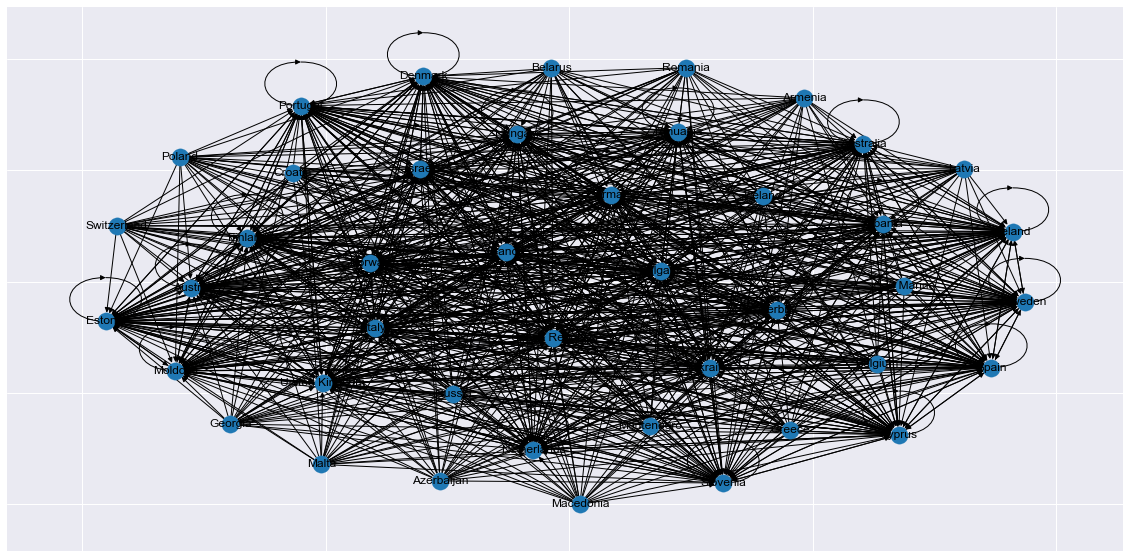

In [8]:
nx.draw_networkx(G)

In [9]:
G.in_degree(weight='points')

InDegreeView({'Albania': 184, 'Israel': 529, 'Cyprus': 436, 'Austria': 342, 'Germany': 340, 'Italy': 308, 'Czech Republic': 281, 'Sweden': 274, 'Estonia': 245, 'Denmark': 226, 'Moldova': 209, 'Lithuania': 181, 'France': 173, 'Bulgaria': 166, 'Norway': 144, 'Ireland': 136, 'Ukraine': 130, 'Netherlands': 121, 'Serbia': 113, 'Australia': 99, 'Hungary': 93, 'Slovenia': 64, 'Spain': 61, 'United Kingdom': 48, 'Finland': 46, 'Portugal': 39, 'Belarus': 0, 'Belgium': 0, 'Croatia': 0, 'Macedonia': 0, 'Greece': 0, 'Iceland': 0, 'Latvia': 0, 'Malta': 0, 'Poland': 0, 'Romania': 0, 'Russia': 0, 'Switzerland': 0, 'Armenia': 0, 'Georgia': 0, 'Montenegro': 0, 'Azerbaijan': 0, 'San Marino': 0})

In [10]:
G.out_degree(weight='points')

OutDegreeView({'Albania': 116, 'Israel': 116, 'Cyprus': 116, 'Austria': 116, 'Germany': 116, 'Italy': 116, 'Czech Republic': 116, 'Sweden': 116, 'Estonia': 116, 'Denmark': 116, 'Moldova': 116, 'Lithuania': 116, 'France': 116, 'Bulgaria': 116, 'Norway': 116, 'Ireland': 116, 'Ukraine': 116, 'Netherlands': 116, 'Serbia': 116, 'Australia': 116, 'Hungary': 116, 'Slovenia': 116, 'Spain': 116, 'United Kingdom': 116, 'Finland': 116, 'Portugal': 116, 'Belarus': 116, 'Belgium': 116, 'Croatia': 116, 'Macedonia': 116, 'Greece': 116, 'Iceland': 116, 'Latvia': 116, 'Malta': 116, 'Poland': 116, 'Romania': 116, 'Russia': 116, 'Switzerland': 116, 'Armenia': 116, 'Georgia': 116, 'Montenegro': 116, 'Azerbaijan': 116, 'San Marino': 116})

In [11]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points'] > 0])

In [12]:
print(nx.info(Gsub))

DiGraph with 43 nodes and 650 edges


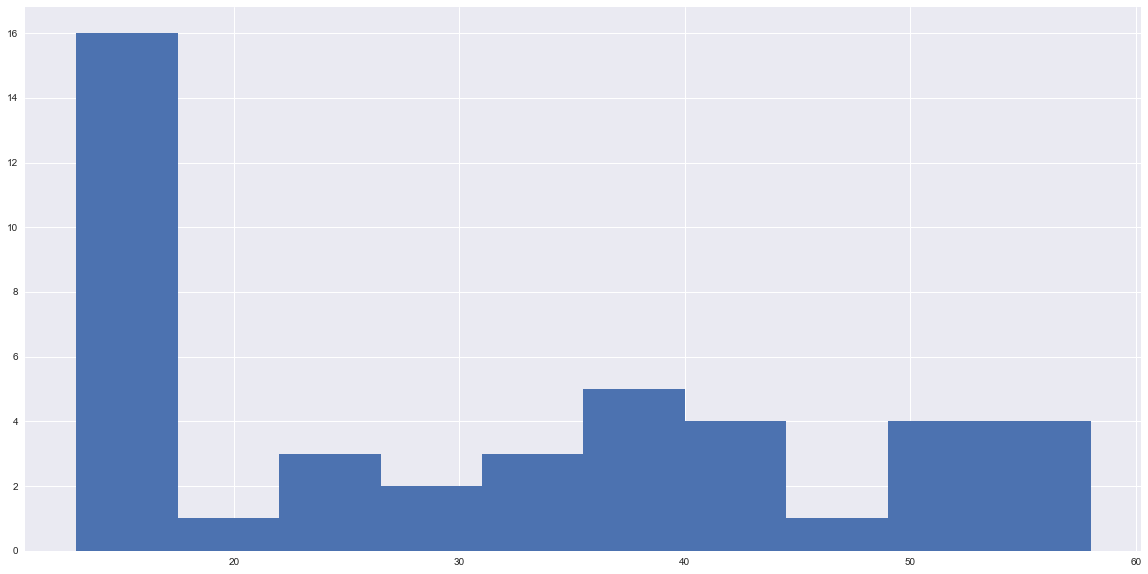

In [13]:
plt.hist(dict(Gsub.degree()).values())
plt.show()

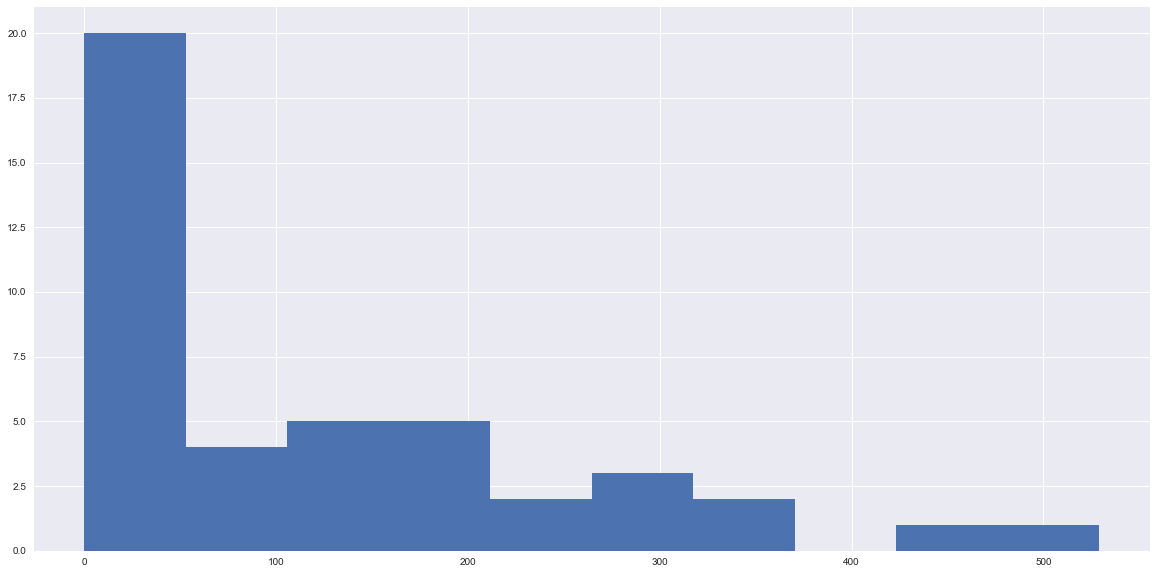

In [14]:
plt.hist(dict(G.in_degree(weight='points')).values())
plt.show()

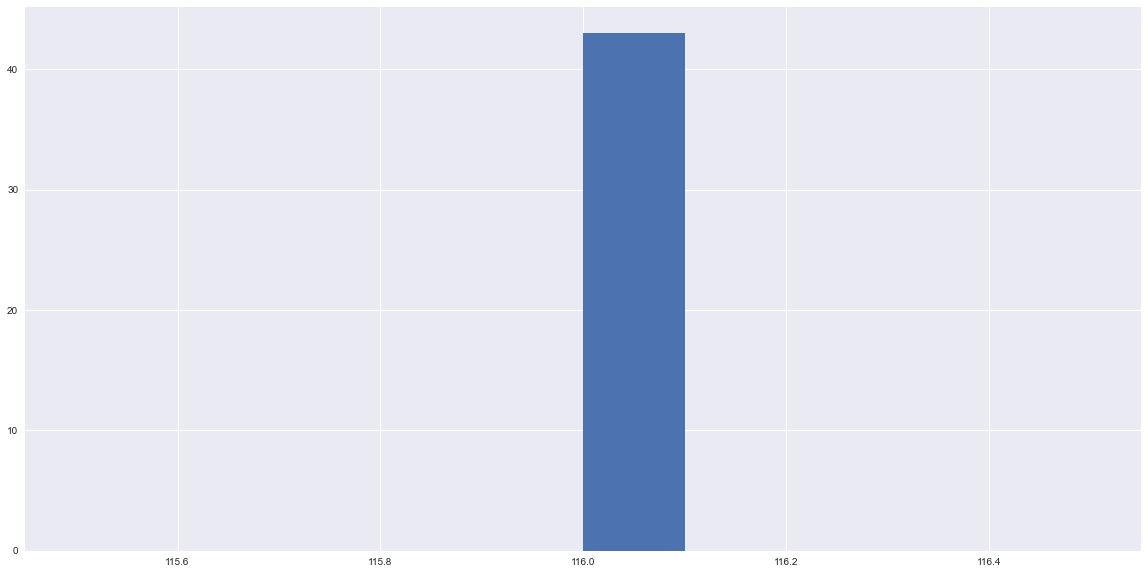

In [15]:
plt.hist(dict(G.out_degree(weight='points')).values())
plt.show()

In [16]:
deg_cen_points = dict(G.in_degree(weight='points'))

In [17]:
print({k : deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k] == max(deg_cen_points.values())})

{'Israel': 529}


In [18]:
page_rank = dict(nx.pagerank(G,weight='points'))

In [19]:
print({k : page_rank[k] for k in page_rank if page_rank[k] == max(page_rank.values())})

{'Israel': 0.09068767468630143}


In [20]:
between_centraility = dict(nx.betweenness_centrality(G,weight='points'))

In [21]:
print({k : between_centraility[k] for k in between_centraility if between_centraility[k] == max(between_centraility.values())})

{'Estonia': 46701.144689294066}


In [22]:
countries = pd.read_csv('countries.csv',index_col='Country', encoding='cp1252')

In [23]:
countries.head()

,cc2,cc3,numeric,latitude,longitude
Country,,,,,
Afghanistan,AF,AFG,4,33.0000,65.0
Albania,AL,ALB,8,41.0000,20.0
Algeria,DZ,DZA,12,28.0000,3.0
American Samoa,AS,ASM,16,-14.3333,-170.0
Andorra,AD,AND,20,42.5000,1.6


In [24]:
countries.columns

Index(['cc2', 'cc3', 'numeric', 'latitude', 'longitude'], dtype='object')

In [25]:
geo = {
    node : (max(-10,min(countries.loc[node]['longitude'],55)),max(countries.loc[node]['latitude'],25)) for node in G.nodes()
}

In [26]:
flags = {}
flags_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = 'flags/' + (countries.loc[node]['cc3']).lower().replace(' ','') + '.png'
    flags_color[node] = ColorThief(flags[node]).get_color(quality=1)

C:\Users\admin\AppData\Local\Temp/ipykernel_12024/4055826129.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for node in tqdm.tqdm_notebook(G.nodes()):


  0%|          | 0/43 [00:00<?, ?it/s]

In [27]:
def RGB(red,green,blue):
    return "#%02x%02x%02x" %(red,green,blue)

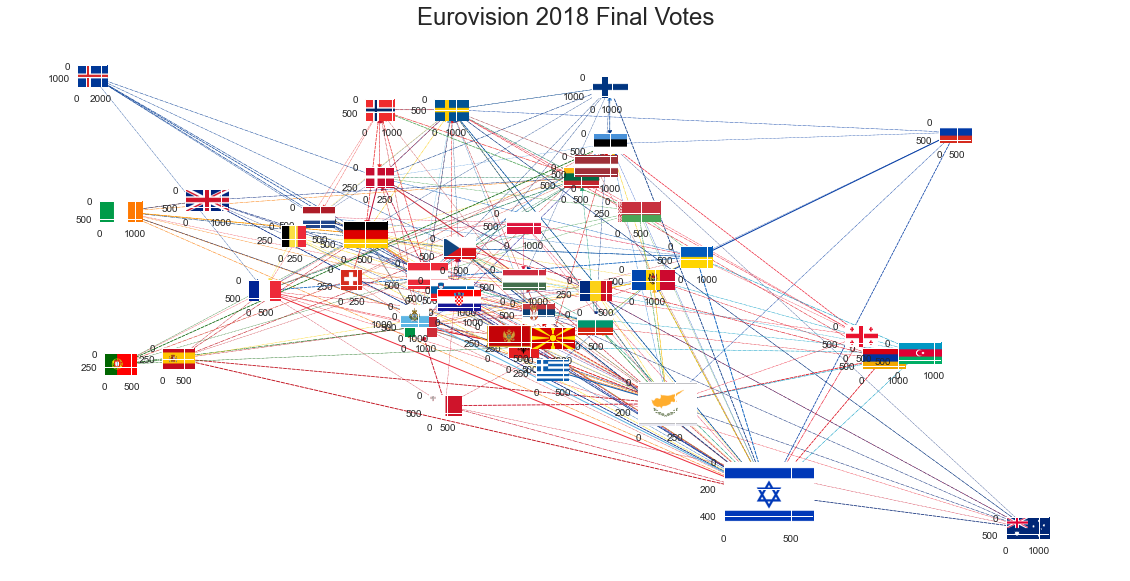

In [28]:
ax = plt.gca()
fig = plt.gcf()

plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize=24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {
    'top' : 'off',
    'bottom' : 'off',
    'left' : 'off',
    'right' : 'off',
    'labelleft' : 'off',
    'labelbottom' : 'off'
}

styles = ['dotted','dashdot','dashed','solid']

for e in G.edges(data=True):
    width = e[2]['points']/24
    style = styles[int(width * 3)]
    
    if width > 0.3:
        nx.draw_networkx_edges(G,geo,edgelist=[e],width=width,style=style,edge_color = RGB(*flags_color[e[0]]))
    

for node in G.nodes():
    imsize = max((0.3 * G.in_degree(node,weight='points')/max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    
    flag = plt.imread(flags[node])
    
    x, y = geo[node]
    xx,yy = trans((x,y))
    xa,ya = trans2((xx,yy))
    
    country = plt.axes([xa - imsize/2.0,ya - imsize/2.0,imsize,imsize])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)

fig.savefig('eurovision_2018_map.png')

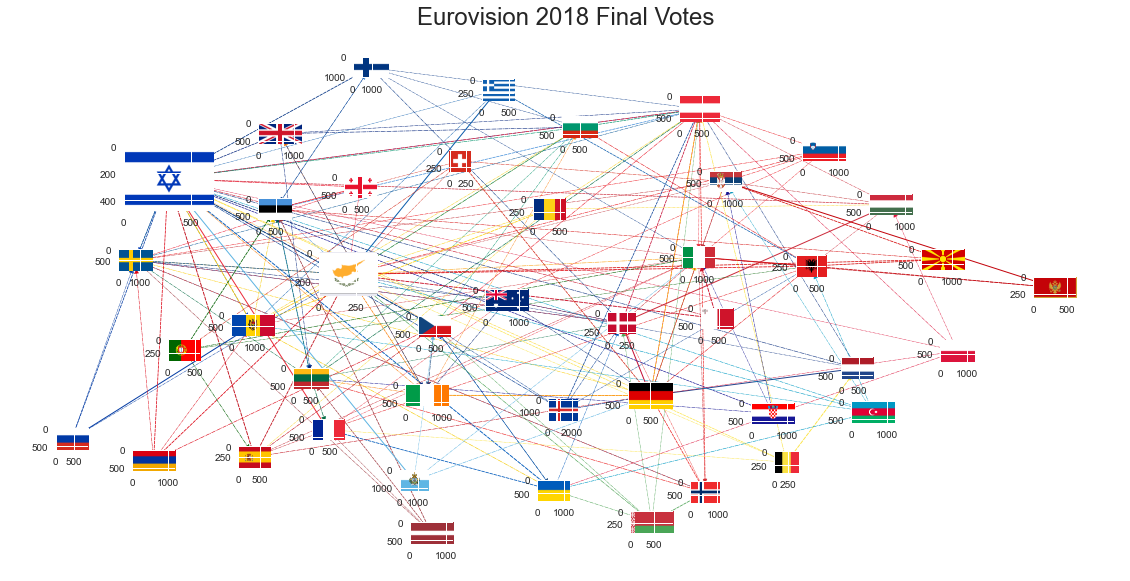

In [29]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off','labelleft':'off', 'labelbottom':'off'}
styles = ['dotted','dashdot','dashed','solid']

for e in G.edges(data=True):
    width = e[2]['points']/24
    style=styles[int(width*3)]
    
    if width>0.4:
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flags_color[e[0]]) )
        
for node in G.nodes():    
    imsize = max((0.3 * G.in_degree(node,weight='points')/max(dict(G.in_degree(weight='points')).values()))**2, 0.03)
    
    flag = plt.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y))
    xa,ya = trans2((xx,yy))
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    
fig.savefig('eurovision2018_spring.png')